In [1]:
library(AppliedPredictiveModeling)
library(caret)

Warning message:
"package 'AppliedPredictiveModeling' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2


In [2]:
# Load test and train data
train <- read.csv("unfiltered_train_data.csv")
test <- read.csv("unfiltered_test_data.csv")

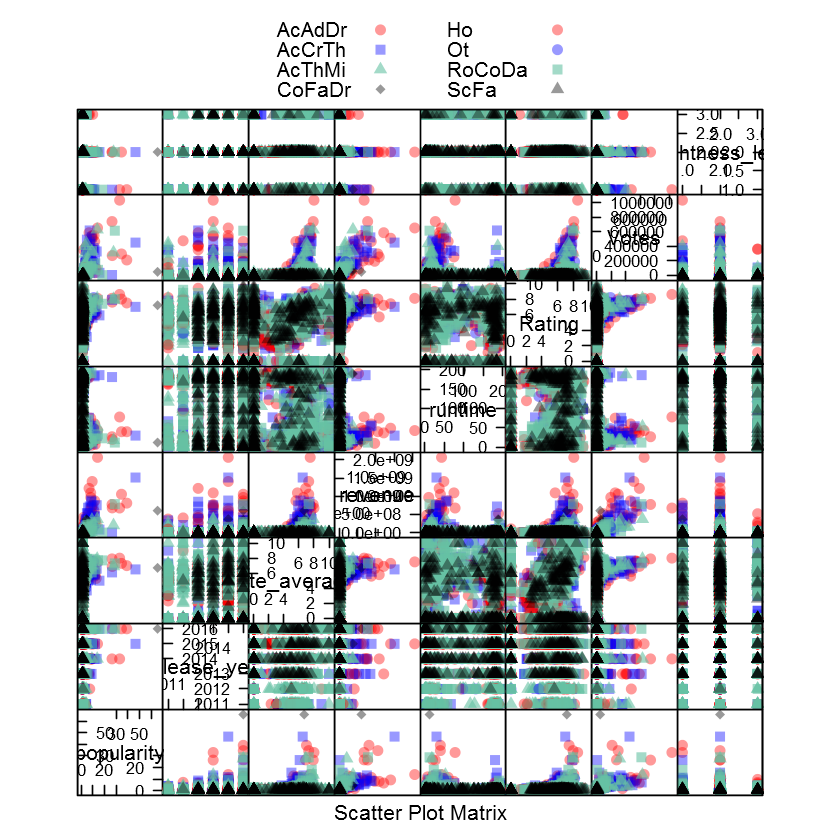

In [3]:
# Perform some data exploration
transparentTheme(trans = .4)
transparentTheme(trans = .4)
featurePlot(x = train[c('popularity', 'release_year', 'vote_average', 
                        'revenue', 'runtime', 'Rating', 'Votes', 
                        'brightness_level')], 
            y = train$genre, 
            plot = "pairs",
            auto.key = list(columns = 2))


In [4]:
# Determine train control to be used to determine cross validation methods
tr.control <- trainControl(## 5-fold CV
                           method = "cv",
                           number = 5)

Loading required package: nnet


# weights:  400 (343 variable)
initial  value 5614.492163 
iter  10 value 5554.454114
iter  20 value 4769.113685
iter  30 value 4617.388931
iter  40 value 4530.818519
iter  50 value 4477.446468
iter  60 value 4447.734165
iter  70 value 4429.649659
iter  70 value 4429.649659
iter  80 value 4403.281768
iter  90 value 4392.936178
iter 100 value 4378.296498
final  value 4378.296498 
stopped after 100 iterations
# weights:  400 (343 variable)
initial  value 5614.492163 
iter  10 value 5554.454114
iter  20 value 4769.113685
iter  30 value 4617.385176
iter  40 value 4528.796799
iter  50 value 4468.706184
iter  60 value 4437.421963
iter  70 value 4422.860488
iter  70 value 4422.860488
iter  80 value 4404.754992
iter  90 value 4390.492528
iter 100 value 4377.395458
final  value 4377.395458 
stopped after 100 iterations
# weights:  400 (343 variable)
initial  value 5614.492163 
iter  10 value 5554.454114
iter  20 value 4769.113685
iter  30 value 4617.384579
iter  40 value 4529.559920
iter  50 va

Penalized Multinomial Regression 

3375 samples
  48 predictor
   8 classes: 'AcAdDr', 'AcCrTh', 'AcThMi', 'CoFaDr', 'Ho', 'Ot', 'RoCoDa', 'ScFa' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2700, 2700, 2700, 2700, 2700 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa     
  0e+00  0.3605926  0.07825566
  1e-04  0.3579259  0.06407364
  1e-01  0.3644444  0.07304528

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was decay = 0.1. 


Accuracy for GLM:  0.3570793

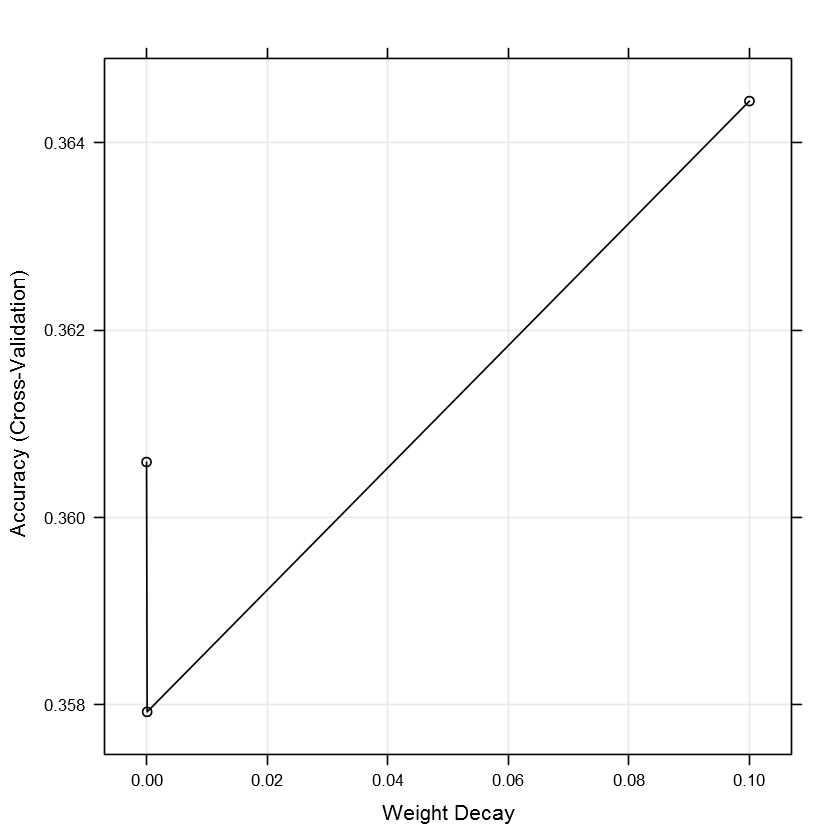

In [5]:
# GLM
set.seed(825)
glm.model <- train(genre ~ ., data = train, 
                 method = "multinom", 
                 trControl = tr.control,
                 #metric = "ROC",
                 verbose = FALSE)
glm.model

trellis.par.set(caretTheme())
plot(glm.model)

glm.pred  <- predict(glm.model, test, type= "prob")
glm.model.acc <- mean(colnames(glm.pred)[apply(glm.pred,1,which.max)] == 
                      test$genre)
cat("\nAccuracy for GLM: ", glm.model.acc)

Loading required package: randomForest
Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



Random Forest 

3375 samples
  48 predictor
   8 classes: 'AcAdDr', 'AcCrTh', 'AcThMi', 'CoFaDr', 'Ho', 'Ot', 'RoCoDa', 'ScFa' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2700, 2700, 2700, 2700, 2700 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   1    0.3422222  0.01059319
   2    0.3964444  0.11857363
   3    0.4151111  0.16469988
   4    0.4240000  0.18589757
   5    0.4171852  0.18292571
   6    0.4213333  0.19333045
   7    0.4192593  0.19730485
   8    0.4088889  0.18810129
   9    0.4165926  0.20146282
  10    0.4121481  0.19747802
  11    0.4059259  0.19243021
  12    0.4008889  0.18610836
  13    0.3988148  0.18437765
  14    0.3988148  0.18513801
  15    0.4032593  0.19208580

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 4. 


Accuracy for Random Forest:  0.4176313

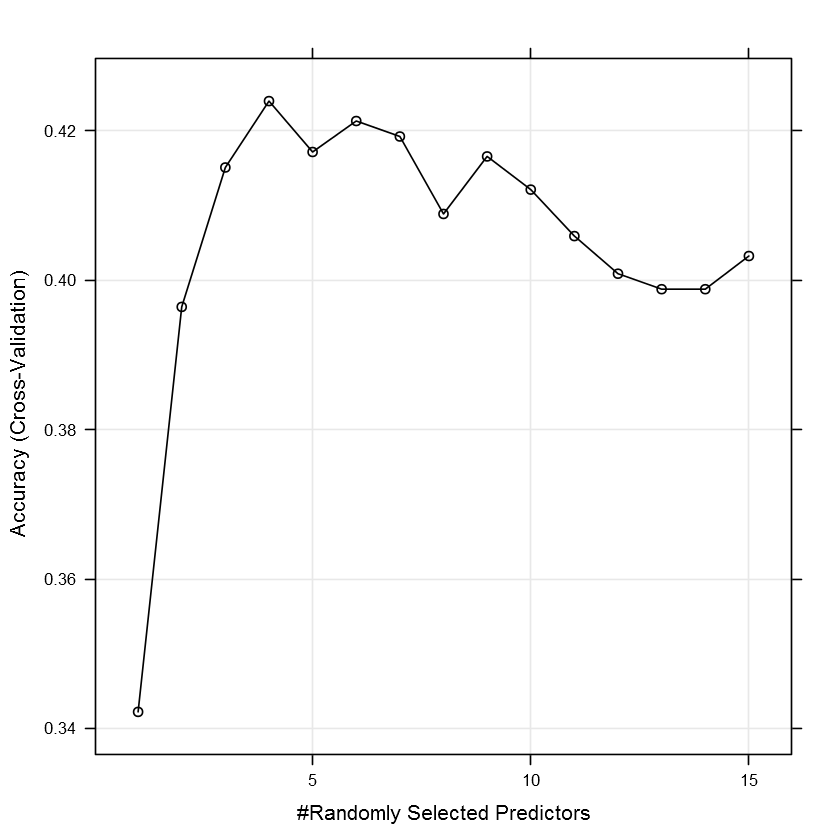

In [6]:
# Random Forest
rfGrid <-  expand.grid(mtry=c(1:15))

set.seed(825)
rf.model <- train(genre ~ ., data = train, 
                 method = "rf", 
                 trControl = tr.control,
                 tuneGrid = rfGrid,
                 #metric = "ROC",
                 verbose = FALSE)
rf.model

trellis.par.set(caretTheme())
plot(rf.model)

rf.pred  <- predict(rf.model, test, type= "prob")
rf.model.acc <- mean(colnames(rf.pred)[apply(rf.pred,1,which.max)] == 
                     test$genre)
cat("\nAccuracy for Random Forest: ", rf.model.acc)

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.3.3"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3
Loading required package: plyr


Stochastic Gradient Boosting 

3375 samples
  48 predictor
   8 classes: 'AcAdDr', 'AcCrTh', 'AcThMi', 'CoFaDr', 'Ho', 'Ot', 'RoCoDa', 'ScFa' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2700, 2700, 2700, 2700, 2700 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                  1000     0.4082963  0.2048803
  1                  1500     0.3979259  0.1933246
  1                  2000     0.3973333  0.1959489
  1                  2500     0.3863704  0.1830279
  5                  1000     0.3668148  0.1670118
  5                  1500     0.3638519  0.1636935
  5                  2000     0.3691852  0.1699701
  5                  2500     0.3650370  0.1644167
  9                  1000     0.3659259  0.1651140
  9                  1500     0.3611852  0.1594664
  9                  2000     0.3608889  0.1595603
  9                  2500     0.3597037  0.1587345

Tuning parameter 'shrinkage' was he


Accuracy for Gradient Boost:  0.4042743

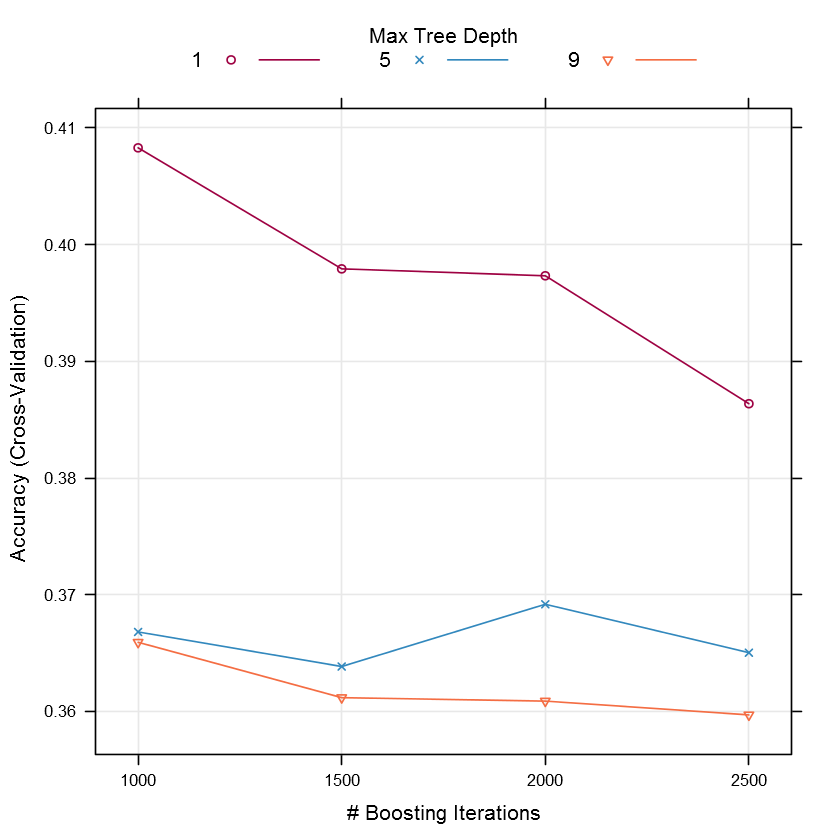

In [7]:
# Gradient Boost
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = c(1000, 1500, 2000, 2500), 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)

set.seed(825)
gbm.model <- train(genre ~ ., data = train, 
                 method = "gbm", 
                 trControl = tr.control,
                 tuneGrid = gbmGrid,
                 #metric = "ROC",
                 verbose = FALSE)
gbm.model

trellis.par.set(caretTheme())
plot(gbm.model)

gbm.pred  <- predict(gbm.model, test, type= "prob")
gbm.model.acc <- mean(colnames(gbm.pred)[apply(gbm.pred,1,which.max)] == 
                      test$genre)
cat("\nAccuracy for Gradient Boost: ", gbm.model.acc)

Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



Support Vector Machines with Radial Basis Function Kernel 

3375 samples
  48 predictor
   8 classes: 'AcAdDr', 'AcCrTh', 'AcThMi', 'CoFaDr', 'Ho', 'Ot', 'RoCoDa', 'ScFa' 

Pre-processing: centered (48), scaled (48) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2700, 2700, 2700, 2700, 2700 
Resampling results across tuning parameters:

  C      sigma  Accuracy   Kappa       
  1e-04  1e-04  0.3360000  0.0000000000
  1e-04  1e-03  0.3360000  0.0000000000
  1e-04  1e-02  0.3360000  0.0000000000
  1e-04  1e-01  0.3360000  0.0000000000
  1e-04  1e+00  0.3360000  0.0000000000
  1e-04  1e+01  0.3360000  0.0000000000
  1e-04  1e+02  0.3360000  0.0000000000
  1e-04  1e+03  0.3360000  0.0000000000
  1e-04  1e+04  0.3360000  0.0000000000
  1e-03  1e-04  0.3360000  0.0000000000
  1e-03  1e-03  0.3360000  0.0000000000
  1e-03  1e-02  0.3360000  0.0000000000
  1e-03  1e-01  0.3360000  0.0000000000
  1e-03  1e+00  0.3360000  0.0000000000
  1e-03  1e+01  0.3360000  0.0000000000
  1e


Accuracy for SVM Radial:  0.3953695

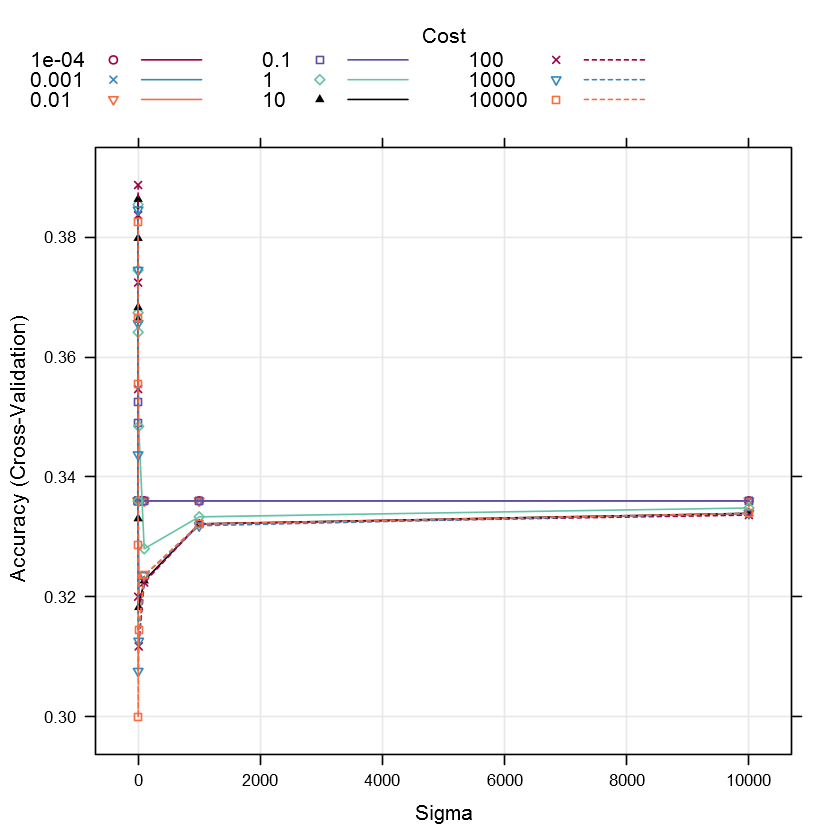

In [8]:
# SVM Radial
svmGrid <- expand.grid(C = 10^(-4:4),
                       sigma = 10^(-4:4))

set.seed(825)
svm.rad.model <- train(genre ~ ., data = train, 
                 method = "svmRadial", 
                 trControl = tr.control, 
                 preProc = c("center", "scale"),
                 tuneGrid = svmGrid,
                 #metric = "ROC",
                 tuneLength = 8)
svm.rad.model

trellis.par.set(caretTheme())
plot(svm.rad.model)

svm.rad.pred  <- predict(svm.rad.model, test)
svm.model.rad.acc <- mean(svm.rad.pred == test$genre)
cat("\nAccuracy for SVM Radial: ", svm.model.rad.acc)

In [9]:
svm.rad.pred  <- predict(svm.rad.model, test)
svm.model.rad.acc <- mean(svm.rad.pred == test$genre)
cat("\nAccuracy for SVM Radial: ", svm.model.rad.acc)


Accuracy for SVM Radial:  0.3953695

Loading required package: e1071


Support Vector Machines with Linear Kernel 

3375 samples
  48 predictor
   8 classes: 'AcAdDr', 'AcCrTh', 'AcThMi', 'CoFaDr', 'Ho', 'Ot', 'RoCoDa', 'ScFa' 

Pre-processing: centered (48), scaled (48) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2700, 2700, 2700, 2700, 2700 
Resampling results across tuning parameters:

  cost   Accuracy   Kappa     
  1e-04  0.3360000  0.00000000
  1e-03  0.3617778  0.04910880
  1e-02  0.3866667  0.12366458
  1e-01  0.3842963  0.12807796
  1e+00  0.3834074  0.12751677
  1e+01  0.3854815  0.13032533
  1e+02  0.3807407  0.12295805
  1e+03  0.3807407  0.12130961
  1e+04  0.3285926  0.09096436

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cost = 0.01. 


Accuracy for SVM Linear:  0.3909172

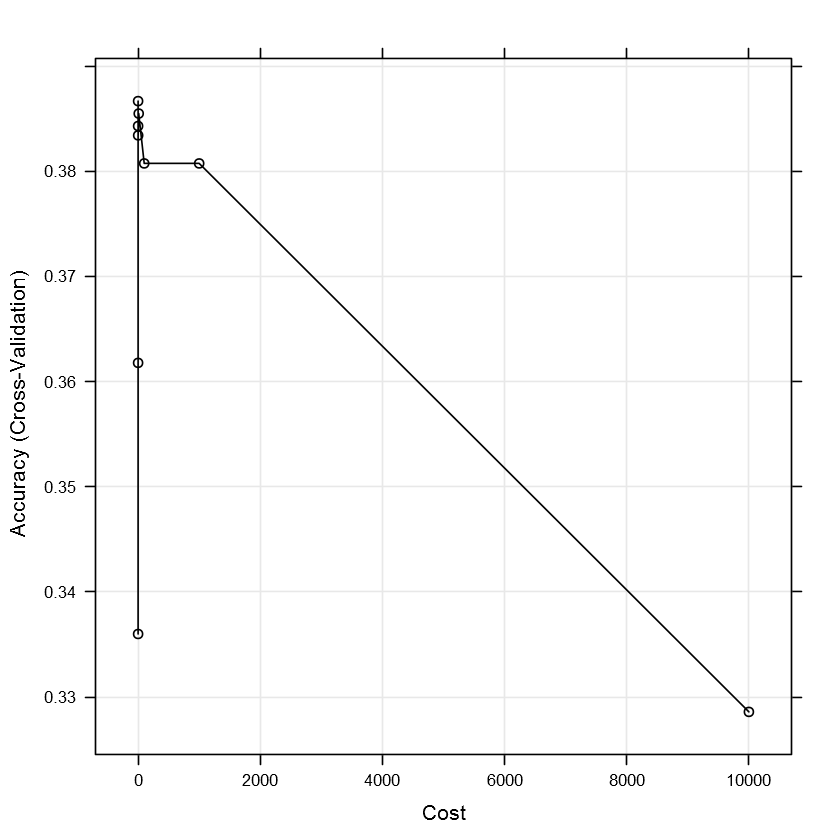

In [10]:
# SVM Linear
svmGrid <- expand.grid(cost = 10^(-4:4))

set.seed(825)
svm.lin.model <- train(genre ~ ., data = train, 
                 method = "svmLinear2", 
                 trControl = tr.control, 
                 preProc = c("center", "scale"),
                 tuneGrid = svmGrid,
                 #metric = "ROC",
                 tuneLength = 8)
svm.lin.model

trellis.par.set(caretTheme())
plot(svm.lin.model)

svm.lin.pred  <- predict(svm.lin.model, test)
svm.model.lin.acc <- mean(svm.lin.pred == test$genre)
cat("\nAccuracy for SVM Linear: ", svm.model.lin.acc)

In [11]:
svm.lin.pred  <- predict(svm.lin.model, test)
svm.model.lin.acc <- mean(svm.lin.pred == test$genre)
cat("\nAccuracy for SVM Linear: ", svm.model.lin.acc)


Accuracy for SVM Linear:  0.3909172

In [12]:
# Combine multiple models to compare results
resamps <- resamples(list(GLM = glm.model,
                          RF = rf.model,
                          GBM = gbm.model,
                          SVM_RAD = svm.rad.model,
                          SVM_LIN = svm.lin.model))
resamps


Call:
resamples.default(x = list(GLM = glm.model, RF = rf.model, GBM =
 gbm.model, SVM_RAD = svm.rad.model, SVM_LIN = svm.lin.model))

Models: GLM, RF, GBM, SVM_RAD, SVM_LIN 
Number of resamples: 5 
Performance metrics: Accuracy, Kappa 
Time estimates for: everything, final model fit 

In [13]:
summary(resamps)


Call:
summary.resamples(object = resamps)

Models: GLM, RF, GBM, SVM_RAD, SVM_LIN 
Number of resamples: 5 

Accuracy 
          Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
GLM     0.3541  0.3600 0.3644 0.3644  0.3719 0.3719    0
RF      0.4089  0.4148 0.4222 0.4240  0.4341 0.4400    0
GBM     0.3881  0.4074 0.4089 0.4083  0.4178 0.4193    0
SVM_RAD 0.3748  0.3837 0.3867 0.3887  0.3911 0.4074    0
SVM_LIN 0.3778  0.3807 0.3896 0.3867  0.3911 0.3941    0

Kappa 
           Min. 1st Qu.  Median    Mean 3rd Qu.   Max. NA's
GLM     0.05563 0.07507 0.07585 0.07305 0.07688 0.0818    0
RF      0.16290 0.17270 0.18290 0.18590 0.19960 0.2113    0
GBM     0.17070 0.19700 0.20850 0.20490 0.22090 0.2273    0
SVM_RAD 0.10470 0.11410 0.11780 0.12310 0.12230 0.1566    0
SVM_LIN 0.10300 0.11420 0.12270 0.12370 0.13490 0.1436    0


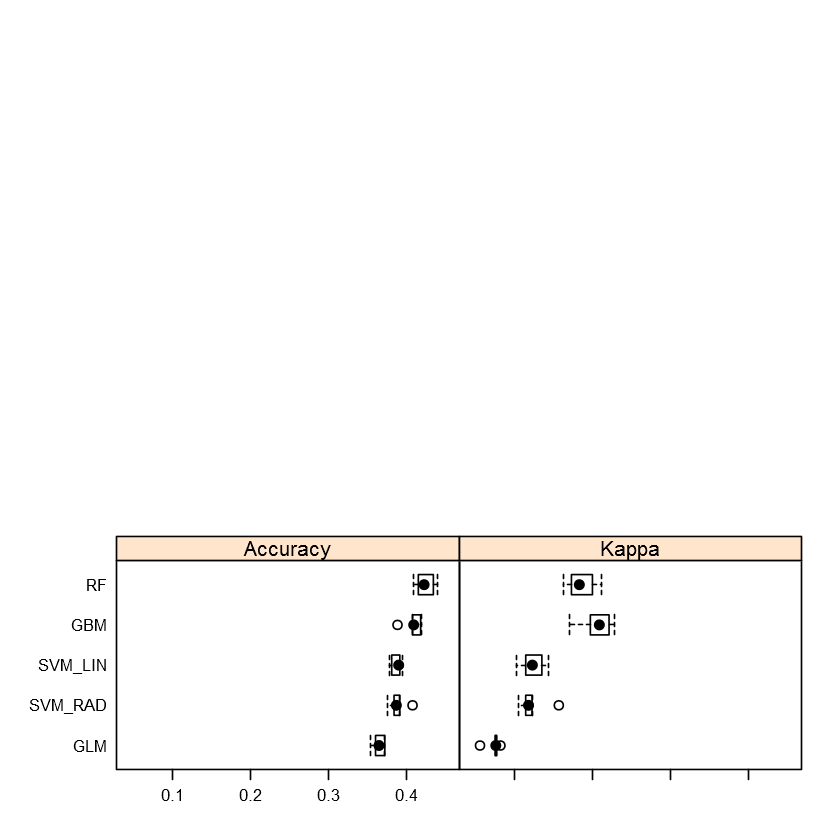

In [14]:
#trellis.par.set(theme1)
bwplot(resamps, layout = c(2, 3))

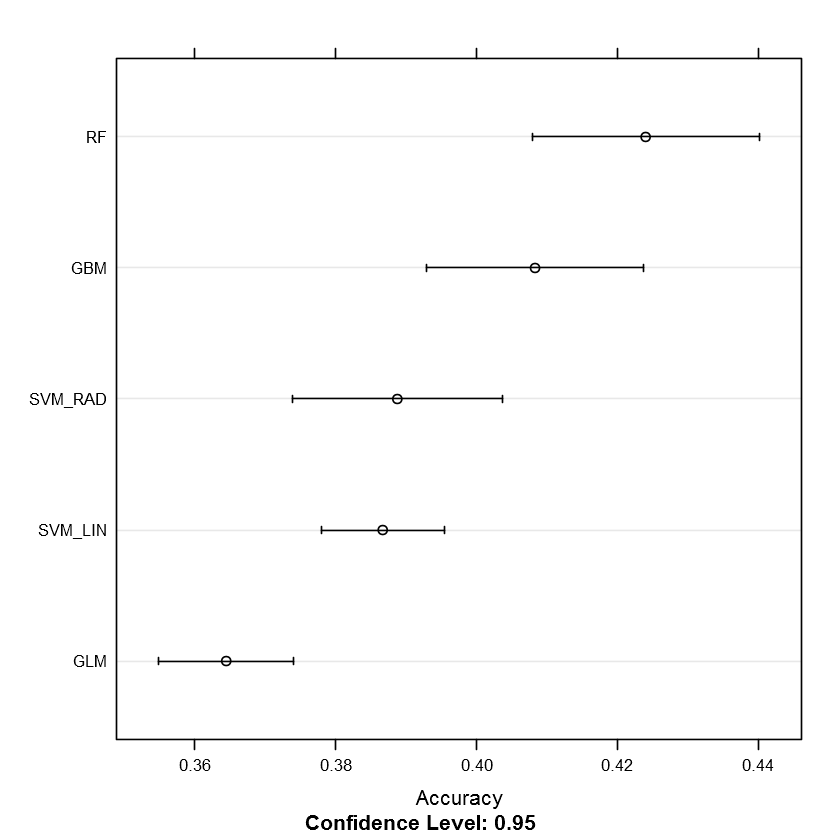

In [15]:
trellis.par.set(caretTheme())
dotplot(resamps, metric = "Accuracy")

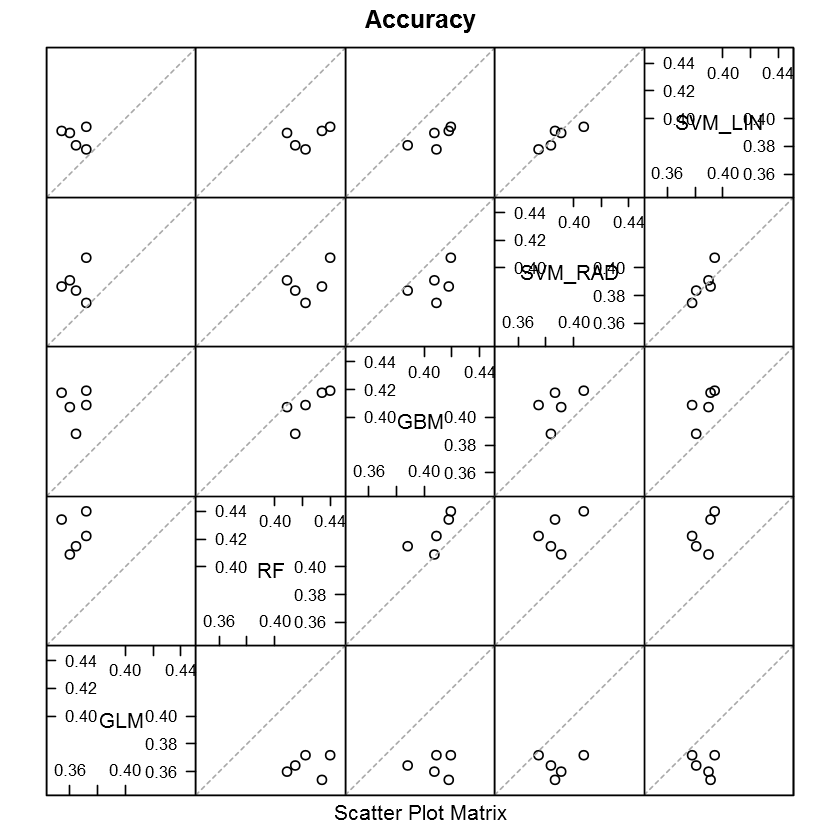

In [16]:
splom(resamps)


Call:
diff.resamples(x = resamps)

Models: GLM, RF, GBM, SVM_RAD, SVM_LIN 
Metrics: Accuracy, Kappa 
Number of differences: 10 
p-value adjustment: bonferroni 

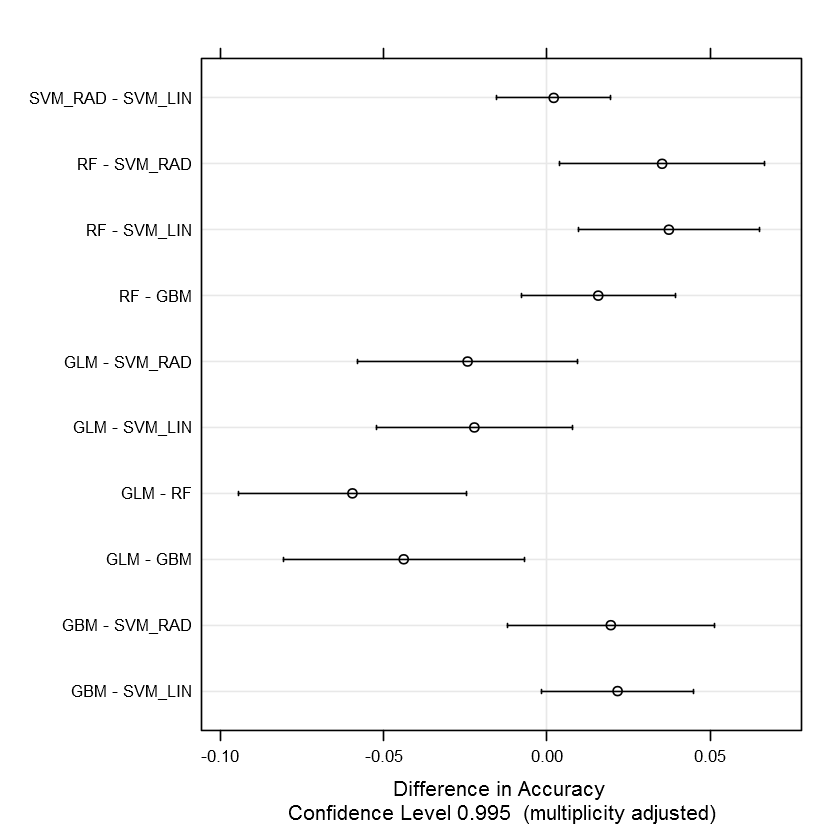

In [17]:
difValues <- diff(resamps)
difValues
trellis.par.set(caretTheme())
dotplot(difValues)